#¿Qué tipos de violencia nos encontramos en la música popular?

In [1]:
import pandas as pd 
import seaborn as sns 
import plotly as ptly 
import os

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
os.getcwd()

'/content'

In [4]:
#hls_df = pd.read_csv("/content/drive/My Drive/Equipo Azul_ AI Saturdays /Repo Proyecto /top_songs_with_lyrics(1).csv")
hls_df = pd.read_csv("/content/top_songs_with_lyrics.csv")
hls_df.head()

,artists,explicit,genre,lyric,lyric_provider,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,violencia
0,MALUMA,NaN,NaN,Deja de mentirte (ah)\nLa foto que subiste con...,Google,NaN,1,HAWAI,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
1,"SECH,DADDY YANKEE,J BALVIN FEATURING ROSALIA,F...",1.0,NaN,NaN,MusicMatch,90.0,2,RELACION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,"J BALVIN,DUA LIPA,BAD BUNNY & TAINY",NaN,NaN,You know that sometimes\nI think about us now ...,Google,NaN,3,UN DIA (ONE DAY),0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
3,OZUNA,0.0,Latin / Pop in Spanish,"Uoo oh (oye ma')\nBaby, baby\nOzuna\n\nAunque ...",MusicMatch,79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
4,NIO GARCIA X ANUEL AA X MYKE TOWERS X BRRAY X ...,NaN,NaN,NaN,NaN,NaN,5,LA JEEPETA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [5]:
violence_label = hls_df[['explicit','genre','Violencia verbal'	,'Violencia Física'	,'Violencia Psicológica'	,'Violencia Sexual','VIolencia Económica','Violencia Simbólica', 'Apto para niñxs','clase']]
violence_label = violence_label[violence_label['clase'].isnull()==False]####
violence_label.head()

,explicit,genre,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase
0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,Latin / Pop in Spanish,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


explicit                  50.0
Violencia verbal          33.0
Violencia Física          10.0
Violencia Psicológica     45.0
Violencia Sexual          53.0
VIolencia Económica       10.0
Violencia Simbólica      117.0
Apto para niñxs          130.0
clase                    227.0
dtype: float64


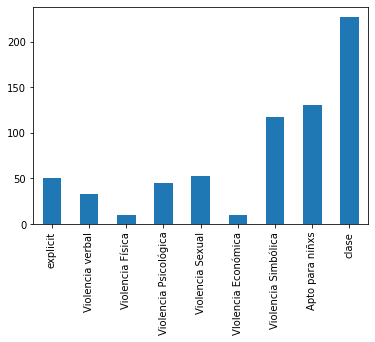

In [6]:
Violence_type=violence_label.sum()#.sort_values()
print(Violence_type)
Violence_type.plot.bar()

##¿Qué géneros musicales podrían contener más violencia?

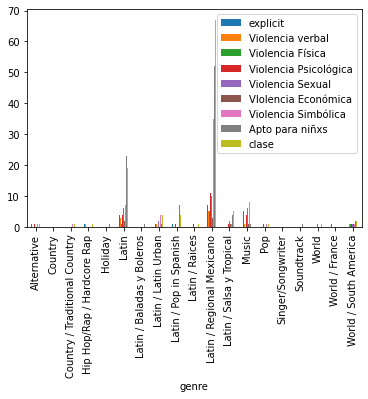

In [7]:
violence_label.groupby(by='genre').sum().plot.bar()

##¿Cómo se relacionan los tipos de violencia entre sí?

In [8]:
corr_violence=violence_label.corr()
corr_violence

,explicit,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase
explicit,1.000000,0.301381,0.137171,0.127688,0.147308,0.049365,0.162378,-0.166433,0.154916
Violencia verbal,0.301381,1.000000,0.191702,0.252905,0.168756,0.134055,0.193300,-0.032039,0.294493
Violencia Física,0.137171,0.191702,1.000000,0.104038,0.089241,0.183368,0.122294,0.051104,0.158198
Violencia Psicológica,0.127688,0.252905,0.104038,1.000000,0.139534,0.104038,0.288141,-0.031588,0.349395
Violencia Sexual,0.147308,0.168756,0.089241,0.139534,1.000000,0.135707,0.144027,-0.068560,0.381343
VIolencia Económica,0.049365,0.134055,0.183368,0.104038,0.135707,1.000000,0.088439,0.002096,0.158067
Violencia Simbólica,0.162378,0.193300,0.122294,0.288141,0.144027,0.088439,1.000000,-0.133659,0.612832
Apto para niñxs,-0.166433,-0.032039,0.051104,-0.031588,-0.068560,0.002096,-0.133659,1.000000,-0.023177
clase,0.154916,0.294493,0.158198,0.349395,0.381343,0.158067,0.612832,-0.023177,1.000000


[]

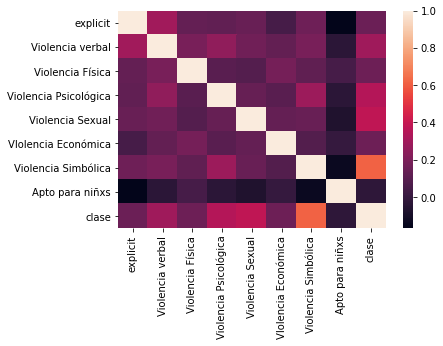

In [9]:
ax = sns.heatmap(corr_violence)
ax.plot()

In [10]:
violence_label_artist = hls_df[['artists','explicit','Violencia verbal'	,'Violencia Física'	,'Violencia Psicológica'	,'Violencia Sexual','VIolencia Económica','Violencia Simbólica', 'Apto para niñxs']]
violence_label_artist.head()

,artists,explicit,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs
0,MALUMA,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,"SECH,DADDY YANKEE,J BALVIN FEATURING ROSALIA,F...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,"J BALVIN,DUA LIPA,BAD BUNNY & TAINY",NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,OZUNA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NIO GARCIA X ANUEL AA X MYKE TOWERS X BRRAY X ...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
#violence_label_artist.groupby(by='artists').sum().plot.bar()

# Palabras Recurrentes en la música con violencia y sin violencia 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata
import os
import glob

#####Instalación de recursos 
!pip install --upgrade pip
!pip install nltk
!pip3 install es_core_news_md
!python -m spacy download es_core_news_md
#import spacy
#nlp = spacy.load('es_core_news_md')

####NLTK
import re
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
import es_core_news_md
nlp = es_core_news_md.load()

###para lematización 
import spacy
import es_core_news_md

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#raw_data_path = os.path.join('data', 'raw')
#all_files = glob.glob(raw_data_path +"/prov_top_songs_with_lyrics.csv")
#lyrics_df = pd.concat(pd.read_csv(f) for f in all_files)
#lyrics_df = pd.read_csv('/content/drive/MyDrive/Equipo Azul_ AI Saturdays /Repo Proyecto /top_songs_with_lyrics.csv')
lyrics_df = pd.read_csv('/content/top_songs_with_lyrics.csv')
lyrics_df.head(20)
columnLyric='lyric'

lyrics_df = lyrics_df[lyrics_df[columnLyric].isnull()==False]
lyrics_df = lyrics_df[lyrics_df['clase'].isnull()==False]
lyrics_df.head(10)
#lyrics_df.keys()

,artists,explicit,genre,lyric,lyric_provider,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,violencia
0,MALUMA,NaN,NaN,Deja de mentirte (ah)\nLa foto que subiste con...,Google,NaN,1,HAWAI,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
2,"J BALVIN,DUA LIPA,BAD BUNNY & TAINY",NaN,NaN,You know that sometimes\nI think about us now ...,Google,NaN,3,UN DIA (ONE DAY),0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
3,OZUNA,0.0,Latin / Pop in Spanish,"Uoo oh (oye ma')\nBaby, baby\nOzuna\n\nAunque ...",MusicMatch,79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
5,KAROL G,0.0,NaN,"Ovy on the drums\n\nYo no te estaba buscando, ...",MusicMatch,80.0,6,"AY,DIOS MIO!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,BLACK EYED PEAS X J BALVIN,1.0,Latin / Pop in Spanish,"This is the rhythm, rhythm, rhythm, rhythm\nTh...",MusicMatch,82.0,8,RITMO (BAD BOYS FOR LIFE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,"OZUNA,DOJA CAT & SIA",1.0,NaN,Ah-ah-ah-oh-oh-oh\nAh-ah-ah-yo-oh (yeah-eh)\nA...,MusicMatch,81.0,10,DEL MAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
10,LOS DOS CARNALES,0.0,Music,"Pocas amistades, a la más sincera la llevo en ...",MusicMatch,74.0,12,EL ENVIDIOSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
11,"FEID,J BALVIN,MALUMA,NICKY JAM,SECH & JUSTIN Q...",NaN,NaN,"A ninguna quiero como tú, como tú\n\nMirándome...",Google,NaN,13,PORFA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
14,FARRUKO,1.0,NaN,"A ella ya no le motiva salir\nQuedó traumada, ...",MusicMatch,29.0,16,LA TOXICA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
16,ESLABON ARMADO,0.0,Music,Con tus besos me haces sentir bien\nSimplement...,MusicMatch,22.0,18,CON TUS BESOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [14]:
## Agregar Lematizacion o Stemming 
## Agregar remover acentos 
## completar lista de stop words 

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['querer', 'poder', 'hacer', 'haber', 'tener', 'sentir','rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords
    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    #    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]


    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = remove_accents(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)
    
    
    return input_lyric

In [15]:
eda_lyrics_df = lyrics_df
columnLyric
df=lyrics_df[columnLyric].str.lower()
for i, j in df.items():
    df[i]=clean_lyric(j)
eda_lyrics_df[columnLyric]=df
eda_lyrics_df.head()
print(type(eda_lyrics_df))
print(type(df))

eda_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 1083
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artists                483 non-null    object 
 1   explicit               436 non-null    float64
 2   genre                  294 non-null    object 
 3   lyric                  483 non-null    object 
 4   lyric_provider         483 non-null    object 
 5   musixmatch_rating      449 non-null    float64
 6   rank                   483 non-null    int64  
 7   title                  483 non-null    object 
 8   Violencia verbal       369 non-null    float64
 9   Violencia Física       369 non-null    float64
 10  Violencia Psicológica  368 non-null    float64
 11  Violencia Sexual       369 non-null    float64
 12  VIolencia Económica    369 non-null    float64
 13  Violencia Simbólica    368 non-null

In [16]:
eda_lyrics_df = eda_lyrics_df[eda_lyrics_df[columnLyric].isnull()==False]
eda_lyrics_df = eda_lyrics_df[eda_lyrics_df['clase'].isnull()== False]
eda_lyrics_df = eda_lyrics_df[[columnLyric,'clase']]
eda_lyrics_df.head()

,lyric,clase
0,"[dejar, mentirte, subir, decir, cielo, conocer...",1.0
2,"[sometimes, think, never, wanna, olvidar, cont...",1.0
3,"[ozuna, curiosidad, pretender, quedarme, ansie...",1.0
5,"[drums, buscar, coincidir, coser, conquistando...",0.0
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0.0


###¿Cómo se distribuye la clasificación 'violento (1)' y 'no violento (0) en nuestor dataset?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



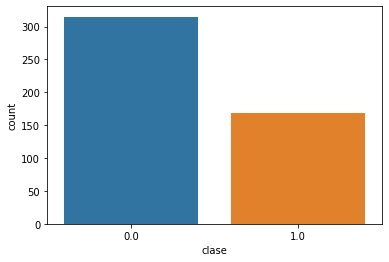

In [17]:
sns.countplot(eda_lyrics_df['clase'], label = 'Count')

In [18]:
eda_lyrics_df['length'] = eda_lyrics_df['lyric'].apply(len)
eda_lyrics_df

,lyric,clase,length
0,"[dejar, mentirte, subir, decir, cielo, conocer...",1.0,91
2,"[sometimes, think, never, wanna, olvidar, cont...",1.0,131
3,"[ozuna, curiosidad, pretender, quedarme, ansie...",1.0,150
5,"[drums, buscar, coincidir, coser, conquistando...",0.0,70
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0.0,148
...,...,...,...
1077,"[decir, hablar, burlar, segun, notar, rogar, i...",0.0,95
1079,"[seguir, seguir, gustar, gustar, disgustar, pe...",0.0,78
1081,"[penar, penar, destrozar, penar, penar, destro...",0.0,37
1082,"[echarnos, rolita, compa, edwin, trakalosa, mo...",0.0,100


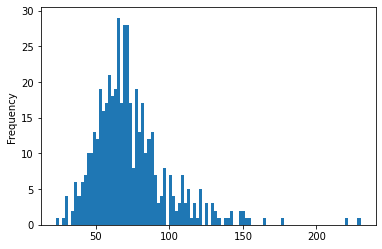

In [19]:
eda_lyrics_df['length'].plot(bins=100, kind='hist') 

In [20]:
eda_lyrics_df[eda_lyrics_df['length'] == 72]['lyric'].iloc[0]

['necesario',
 'hablarme',
 'bonito',
 'darme',
 'besar',
 'cerrar',
 'oiitos',
 'promesa',
 'cumplirlas',
 'decir',
 'necesario',
 'acariciar',
 'ternura',
 'ilusionar',
 'despues',
 'mandar',
 'basura',
 'avisar',
 'cuerpo',
 'sentimiento',
 'bueno',
 'obsesionarme',
 'haberme',
 'entregar',
 'tambien',
 'desear',
 'avisar',
 'corazon',
 'deber',
 'tomarse',
 'medir',
 'correcto',
 'creerte',
 'mentira',
 'avisar',
 'herir',
 'avisar',
 'doler',
 'corazon',
 'comer',
 'doler',
 'tomar',
 'tequila',
 'edwin',
 'trakalosa',
 'monterrey',
 'necesario',
 'acariciar',
 'ternura',
 'ilusionar',
 'despues',
 'mandar',
 'basura',
 'avisar',
 'cuerpo',
 'sentimiento',
 'bueno',
 'obsesionarme',
 'haberme',
 'entregar',
 'tambien',
 'desear',
 'avisar',
 'corazon',
 'deber',
 'tomarse',
 'medir',
 'correcto',
 'creerte',
 'mentira',
 'avisar',
 'herir']

In [21]:
positive = eda_lyrics_df[eda_lyrics_df['clase']==0]
positive

,lyric,clase,length
5,"[drums, buscar, coincidir, coser, conquistando...",0.0,70
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0.0,148
10,"[amistad, sincero, llevar, listo, amigo, ayuda...",0.0,90
16,"[simplemente, encantar, formar, caminar, matar...",0.0,89
43,"[nakamura, hello, jentends, bails, atroz, para...",0.0,137
...,...,...,...
1077,"[decir, hablar, burlar, segun, notar, rogar, i...",0.0,95
1079,"[seguir, seguir, gustar, gustar, disgustar, pe...",0.0,78
1081,"[penar, penar, destrozar, penar, penar, destro...",0.0,37
1082,"[echarnos, rolita, compa, edwin, trakalosa, mo...",0.0,100


In [22]:
negative = eda_lyrics_df[eda_lyrics_df['clase']==1]
negative

,lyric,clase,length
0,"[dejar, mentirte, subir, decir, cielo, conocer...",1.0,91
2,"[sometimes, think, never, wanna, olvidar, cont...",1.0,131
3,"[ozuna, curiosidad, pretender, quedarme, ansie...",1.0,150
8,"[perder, arenar, tarar, sonar, tropical, quema...",1.0,121
11,"[ninguno, comer, comer, mirandome, preguntar, ...",1.0,130
...,...,...,...
753,"[solucion, final, corazon, seguir, latir, ment...",1.0,78
987,"[apenar, mirar, tratar, pedazo, mirar, tiempo,...",1.0,65
1020,"[morder, labio, poderte, besar, estremecer, po...",1.0,67
1035,"[nunca, contento, contigo, mismo, sindo, lindo...",1.0,60


In [23]:
!pip install WordCloud
from wordcloud import WordCloud

##Mapa de palabras sin etiqueta de violencia 

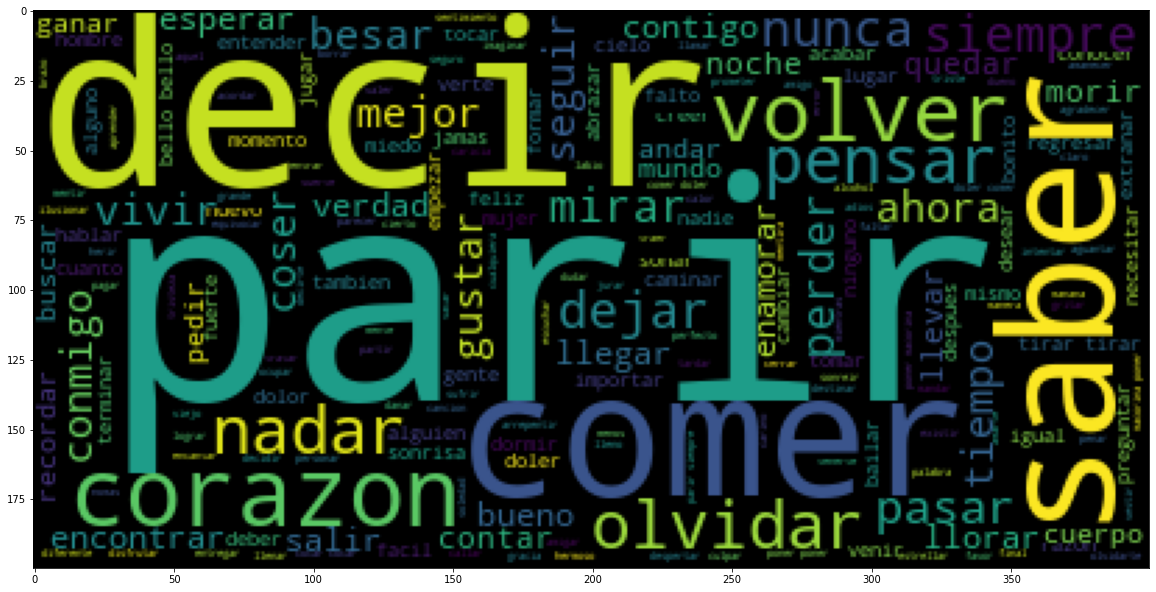

In [24]:

lyric = positive['lyric']
sentences_as_one_string_positive = ""
for word in lyric:
    sentences_as_one_string_positive =sentences_as_one_string_positive+" ".join(word)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string_positive))

#Mapa de palabras sin etiqueta de no violencia 

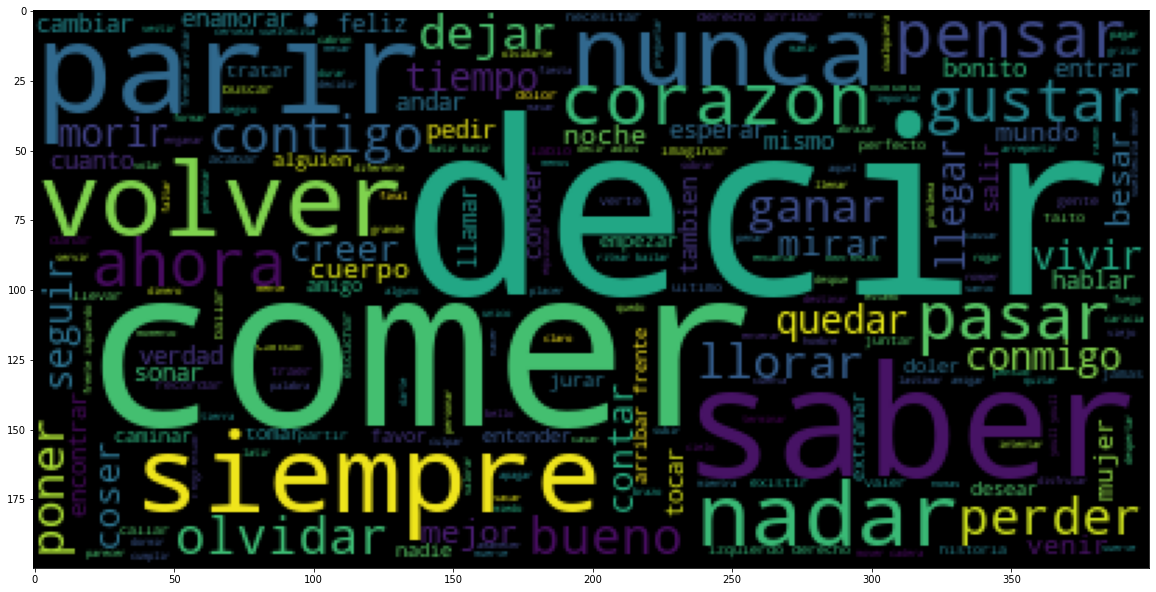

In [25]:
#negative_list = negative['lyric'].tolist()
#negative_sentences_as_one_string = " ".join(negative_list)
lyric = negative['lyric']
negative_sentences_as_one_string = ""
for word in lyric:
    negative_sentences_as_one_string =negative_sentences_as_one_string+" ".join(word)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))